<a href="https://colab.research.google.com/github/bliuzley13/CSE176-Intro-to-Machine-Learning/blob/main/CSE176_Lab_10_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSE 176 Lab 10: Decision Tree

Related lecture: https://ucmercedcse176.github.io/files/lecture_14.pdf

Additional note on decison tree: https://ucmercedcse176.github.io/files/decision_tree.pdf

Credut to [Alexander Lundervold](https://scholar.google.com/citations?user=3mfrDLYAAAAJ&hl=en) for some materials in this notebook

## PART I: Questions on decision tree

**Question 1**: A node of a decision tree is pure if it contains instances of the same class. Consider a node and all the training set instances that reach it, and call $p_k$ the proportion of instances of class k,for $k=1,...,K$. Common criteria for impurity of a node include entropy, Gini index, and misclassification error for a probability distribtuion $\mathbf{p}=[p_1,p_2,...,p_K]$.

Entropy:

$\phi(\mathbf{p})=-\sum_k p_k \log_2 p_k$

Gini index:

$\phi(\mathbf{p})=\sum_k p_k (1-p_k)$

Misclassification error:

$\phi(\mathbf{p})=1-\max (p_1,...,p_K)$

(a) Compute the entropy, Gini index, and misclassification error for a probability distribtuion $\mathbf{p}=[0.4,0.6]$.

In [171]:
# Your solution:
#Entropy: .971
#Gini Index: .48
#Misclassification Error: .4

(b) Compute the entropy, Gini index, and misclassification error for a probability distribtuion $\mathbf{p}=[1.0,0]$.

In [172]:
# Your solution:
#Entropy: 0.0
#Gini Index: 0.0
#Misclassification Error: 0.0

(c) The following plots entropy as a function of $p$ for a two-dimensional probability distribution $\mathbf{p}=[p,1-p]$.

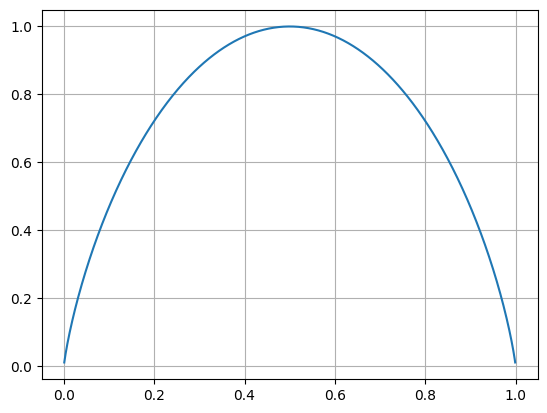

In [173]:
# To display plots directly in the notebook:
%matplotlib inline

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import matplotlib
import numpy as np

p = np.linspace(0.001,1,1000,endpoint=False)

entropy = -p*np.log2(p)-(1-p)*np.log2(1-p)

plt.figure()
plt.plot(p, entropy)
plt.grid()
plt.show()

Plot Gini index and misclassification error as a function of p.

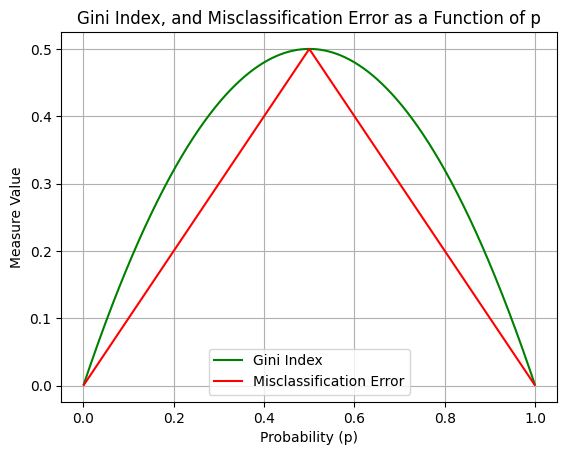

In [174]:
# Your code:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate probability values
p = np.linspace(0.001, 1, 1000, endpoint=False)

# Calculate Gini index and misclassification error
gini_index = p * (1 - p) + (1 - p) * p
misclassification_error = 1 - np.maximum(p, 1 - p)

# Plot Gini index
plt.plot(p, gini_index, label="Gini Index", color="green")

# Plot misclassification error
plt.plot(p, misclassification_error, label="Misclassification Error", color="red")

# Add labels, grid, and legend
plt.xlabel("Probability (p)")
plt.ylabel("Measure Value")
plt.title("Gini Index, and Misclassification Error as a Function of p")
plt.grid()
plt.legend()

# Display the plot
plt.show()


**Question 2**: What strategies can help reduce overfitting in decision trees? Select all that apply.

(a) Pruning

(b) Make sure each leaf node is one pure class

(c) Enforce a minimum number of samples in leaf nodes

(d) Enforce a maximum depth for the tree



In [175]:
# (If you are not sure, finish part II of this lab and come back to this question)
# Your solution:

"""
a: Pruning
c: Enforce a minimum number of samples in leaf nodes
d: Enforce a maximum depth for the tree
"""

'\na: Pruning\nc: Enforce a minimum number of samples in leaf nodes\nd: Enforce a maximum depth for the tree\n'

## Part II: Training decision tree for classification

In this part, we will train a decsion tree for classification with example data.

In [176]:
# some packages to use for the lab
import sklearn
from pathlib import Path
import seaborn as sns

import cv2
from google.colab.patches import cv2_imshow

# To make the notebook reproducible
seed = 42
np.random.seed(seed)

From a set of labelled data, a classification tree learns a set of if-else questions about the features and is used to predict the labels.

To be concrete, let's use the diabetes data set studied in previous notebooks. First, we load it as before:

In [177]:
import urllib.request

url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
urllib.request.urlretrieve(url, 'diabetes.csv')

('diabetes.csv', <http.client.HTTPMessage at 0x7a94eba13c40>)

In [178]:
diabetes = pd.read_csv('diabetes.csv')

It has 8 features and a binary label (diabetes vs. not diabetes):

In [179]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We restrict ourselves to two features for easier visualization:

In [180]:
data = diabetes[['glucose', 'bmi', 'diabetes']]

Here's a scatter plot of the data we have, with glucose levels plotted against bmi and the dots colored by whether the person has diabetes or not:

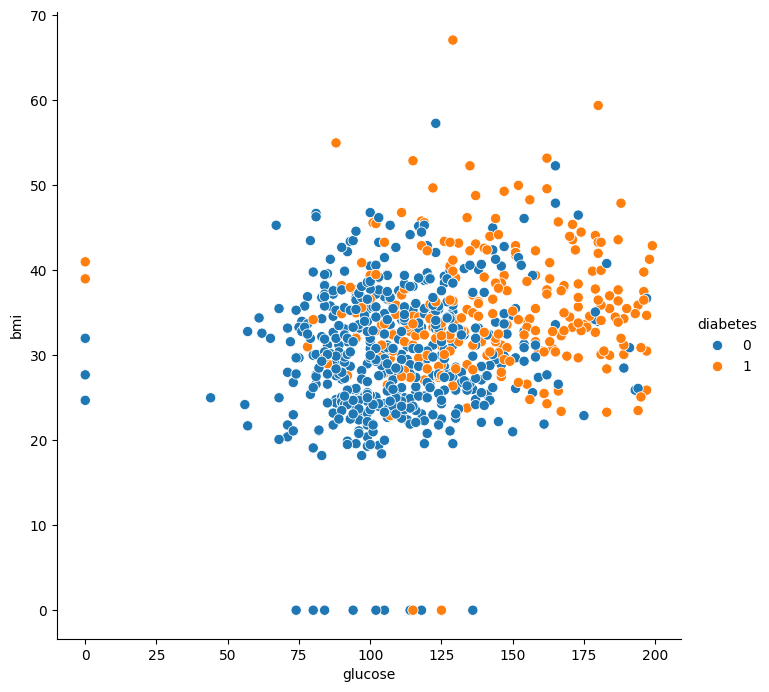

In [181]:
sns.pairplot(x_vars = 'glucose', y_vars = 'bmi', data=data, hue='diabetes',
             height=7,
             plot_kws={"s": 55} # Size of markers
            )
plt.show()

We notice that diabetes instances tend to have higher blood glucose levels and higher body mass index.

To decide whether a person has diabetes, we could therefore make a set of rules saying things like

- "If your glucose level is above 125 *and* your BMI is above 30, predict diabetes."
- "If glucose below 150 _and_ BMI above 40, then predict diabetes"
- and so on...

> Such a set of rules is precisely a **decision tree**.

Let's use scikit-learn to make the rules and the tree for us:

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
#DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=seed) # We'll discuss `max_depth=2` soon

In [184]:
X=data[['glucose', 'bmi']] # The features
y=data['diabetes'] # The labels

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

In [187]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

...and plot it:

In [188]:
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

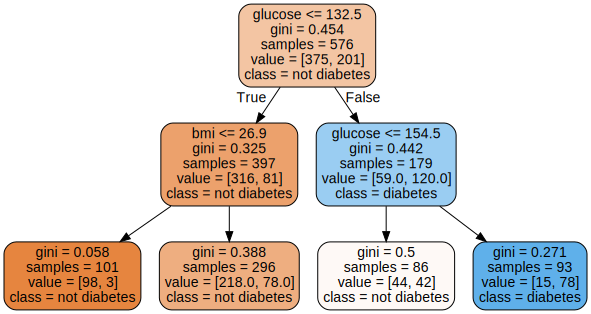

In [189]:
graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=X.columns,
                               class_names=['not diabetes','diabetes'], filled = True, rounded=True))
display(SVG(graph.pipe(format='svg')))

We see that we get something that can be used to make predictions. If you're tasked with diagnosing diabetes or not diabetes for an instance based on this decision tree, you do as follows:

- Start at the root node. If the glucose level is 132.5 or below, take the path on the left. Else take the path on the right.
- If you took the left path, then you look at the BMI.
    - If BMI is less than 26.9, take the next left path. You end at a **leaf node** (a node where you can't go further). Your prediction is then `class = not diabetes`.
    - If the BMI is larger than 26.9, take the right path. You end at another leaf node and make the prediction `class = not diabetes`.
- If you took the right path, then you again look at the glucose.
    - If glucose is less than 154.5, you take the left path. You end up at a leaf node and make the prediction `class = not diabetes`
    - If glucose is larger than 154.5, you take the right path, end up at a leaf node, and make the prediction `class = diabetes`.

This is exactly how predictions are made if you run `tree_clf.predict`. Each instance is fed through the tree according to its features until it hits a leaf node, where the class is assigned.

### Decision trees glossary


- **Root node**: The top-most node. No parent node. Where you start. Poses the first if-else question.


- **Internal node**: Has one parent node and two children. These nodes pose if-else questions.


- **Leaf node**: A node without children. Not possible to go any further. A bottom node. These nodes provide predictions.


- **`samples`**: The number of training samples that the node applies to. The number of training instances that end up passing through the node. For example, there are 179 samples for which the glucose is less than 154.5


- **`value`**: A list of the number of samples *of each class* that the node applies to.


- **`gini`**: A measure of "impurity". The gini is 0 if all the training samples in that node belongs to a single class. It grows towards 1 as the class diversity at the node increases.

In [190]:
# Explain why the Gini index for the root node is 0.454
# Your explanation:
"""The Gini index for the root node is 0.454 because it reflects the diversity of
class distributions among the samples at that node. The Gini index is calculated
using the formula G = one minus the sum of p sub k squared where p sub k
is the porportion of samples belonging to the class k. At the root node, if the
class proportions are approximately balanced, such as p sub one = 0.46 and p sub
two = 0.54, and, the Gini index is calculated as G equals one minus the quantity
zero point four six squared plus zero point five four squared. Substituting the
values, the result is G=1−0.5032=0.454, or "G equals zero point four five four."
This value indicates that the node contains diverse samples, as it is closer to
0.5 than 0 (which would indicate perfect purity). Thus, the Gini index of 0.454
shows that the root node has significant class diversity but is not completely
balanced.
"""

'The Gini index for the root node is 0.454 because it reflects the diversity of \nclass distributions among the samples at that node. The Gini index is calculated \nusing the formula G = one minus the sum of p sub k squared where p sub k\nis the porportion of samples belonging to the class k. At the root node, if the \nclass proportions are approximately balanced, such as p sub one = 0.46 and p sub\ntwo = 0.54, and, the Gini index is calculated as G equals one minus the quantity\nzero point four six squared plus zero point five four squared. Substituting the \nvalues, the result is G=1−0.5032=0.454, or "G equals zero point four five four."\nThis value indicates that the node contains diverse samples, as it is closer to \n0.5 than 0 (which would indicate perfect purity). Thus, the Gini index of 0.454 \nshows that the root node has significant class diversity but is not completely \nbalanced.\n'

Now we measure the accuracy on training and testing sets seperately.

In [191]:
predictions = tree_clf.predict(X_train)
train_accuracy = np.sum(predictions == y_train.values) / predictions.size

predictions = tree_clf.predict(X_test)
test_accuracy = np.sum(predictions == y_test.values) / predictions.size


print(f"train accuracy: {train_accuracy}, test accuracy: {test_accuracy}")


train accuracy: 0.7604166666666666, test accuracy: 0.7083333333333334


Try creating a decision tree with max_depth=5 and visualize the resulting tree as we did above.

Also compute the training accuracy and testing accuracy of the new tree.

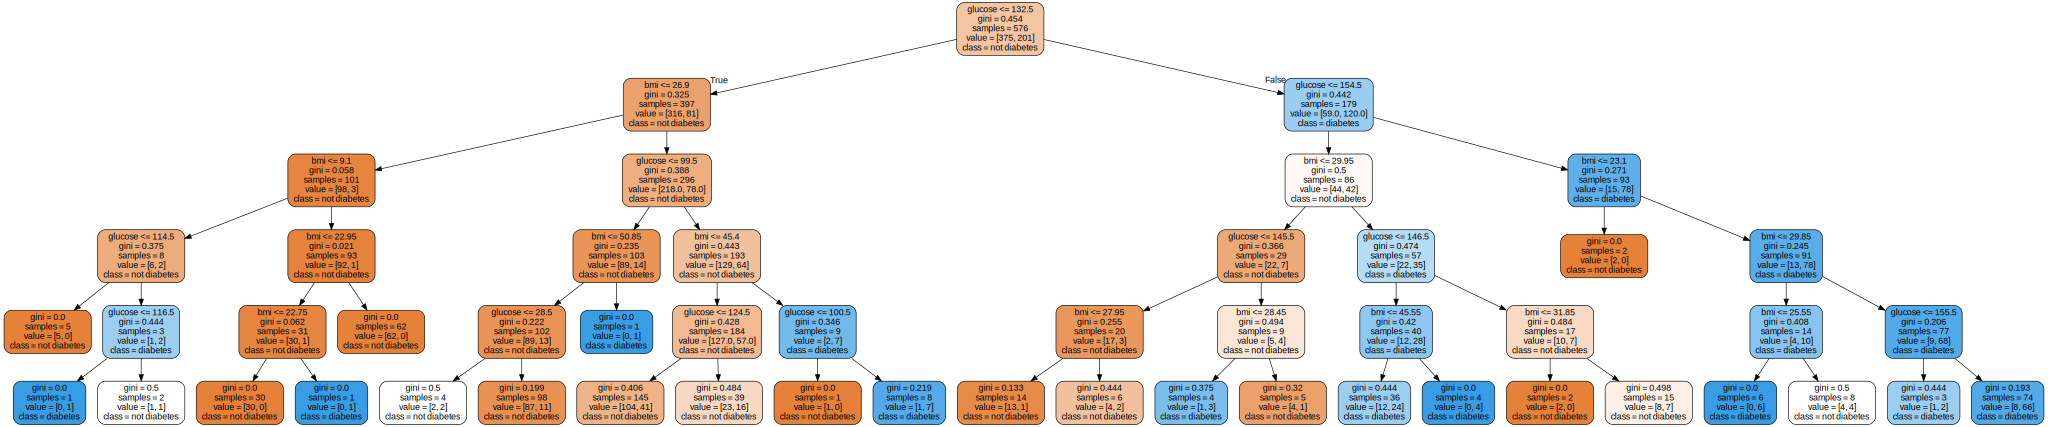

train accuracy: 0.8107638888888888, test accuracy: 0.7135416666666666


In [192]:
# Your code here:
#DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=seed) # We'll discuss `max_depth=2` soon
X=data[['glucose', 'bmi']] # The features
y=data['diabetes'] # The labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)
tree_clf.fit(X_train, y_train)
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz
graph = Source(export_graphviz(tree_clf, out_file=None, feature_names=X.columns,
                               class_names=['not diabetes','diabetes'], filled = True, rounded=True))
display(SVG(graph.pipe(format='svg')))
predictions = tree_clf.predict(X_train)
train_accuracy = np.sum(predictions == y_train.values) / predictions.size

predictions = tree_clf.predict(X_test)
test_accuracy = np.sum(predictions == y_test.values) / predictions.size


print(f"train accuracy: {train_accuracy}, test accuracy: {test_accuracy}")


In the following, we will visualize the decision boundary produced by our decision tree:

## Decision boundaries for decision trees

In [193]:
from matplotlib.colors import ListedColormap

!wget https://raw.githubusercontent.com/alu042/DAT158-2022/master/notebooks/utils.py
# We use a custom function for plotting the decision boundary.
# Have a look at the file `utils.py` if you're curious about how it's made.
from utils import plot_decision_boundary


--2024-12-03 23:22:22--  https://raw.githubusercontent.com/alu042/DAT158-2022/master/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1417 (1.4K) [text/plain]
Saving to: ‘utils.py.4’

utils.py.4          100%[===================>]   1.38K  --.-KB/s    in 0s      

2024-12-03 23:22:22 (21.4 MB/s) - ‘utils.py.4’ saved [1417/1417]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


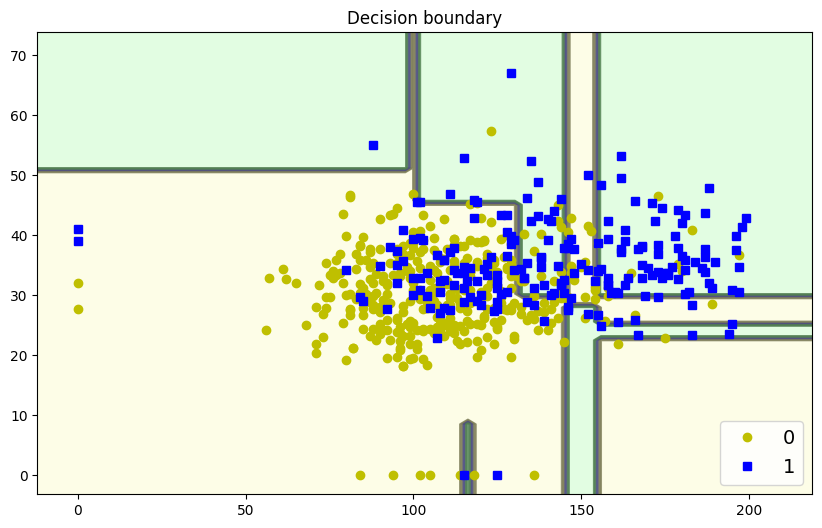

In [194]:
_ = plot_decision_boundary(tree_clf, X_train,y_train)

Let's plot the decision boundary for a tree with `max_depth=3`:

In [195]:
tree_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=seed)

In [196]:
tree_clf_d3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


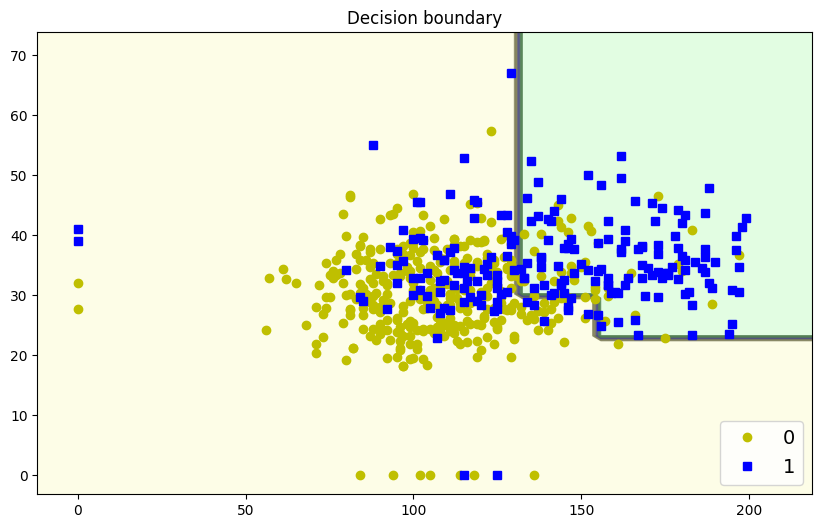

In [197]:
_ = plot_decision_boundary(tree_clf_d3, X_train,y_train)

Note that the boundary is **not linear**. It is not a straight line and is not smooth.

**Note:** The decision boundaries of decision trees are always parallel to an axis. Why is that? It's because each node in a decision tree consists of a test using only **one feature at a time**.

## Estimating class probabilities

As we discussed when studying logistic regression, having models output predictions *and* estimated probabilities is very useful in practice. We want models that can say things like _"the model predicts that you have diabetes with 74% probability"_.

Decision trees are able to do this.

The idea is simple: when an instance is fed to the decision tree, it goes through some path until it ends up at a leaf node. The fraction of each class associated with that leaf is a probability, and we can interpret it as the probability of belonging to each class.

For example, looking at our above tree again,

an instance with glucose level 100 and BMI 35 ends up in the second leaf node. There are 218 not diabetes and 78 diabetes training instances in that node, and the model will spit out the probabilities

$$218/296 = 0.736, \qquad 78/296 = 0.264$$

for not diabetes and diabetes.

Let's try it out:

In [198]:
test_sample = [100, 35]

We use `predict_proba` to get the probabilities:

In [199]:
tree_clf.predict_proba([test_sample,])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.71724138, 0.28275862]])

Calculate the probability for not diabetes for an instance with glucose level 140 and BMI at 25 by hand. Then do the same using scikit-learn.

In [207]:
# Your solution and code:
#Code by Hand
#P(Not Diabetes) = 44/86 = 0.5116
#P(Diabetes) = 42/86 = 0.4884

# Ensure the instance is formatted correctly as a 2D array
test_sample = [140, 25]
tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=seed) # We'll discuss `max_depth=2` soon
tree_clf2.fit(X_train, y_train)
tree_clf2.predict_proba([test_sample,])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.51162791, 0.48837209]])

# Regularization: preventing overfitting

If you put no constraints on the decision trees, they will very quickly produce very complex decision boundaries, which leads to overfitting. In fact, if you let the trees grow until all the leaves are *pure*, i.e., consisting of data points that are all of the same class, then the decision tree will be 100% accurate on the training set. That's typically not good...

Let's see this in action on our data set:

## Overfitting the diabetes data set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

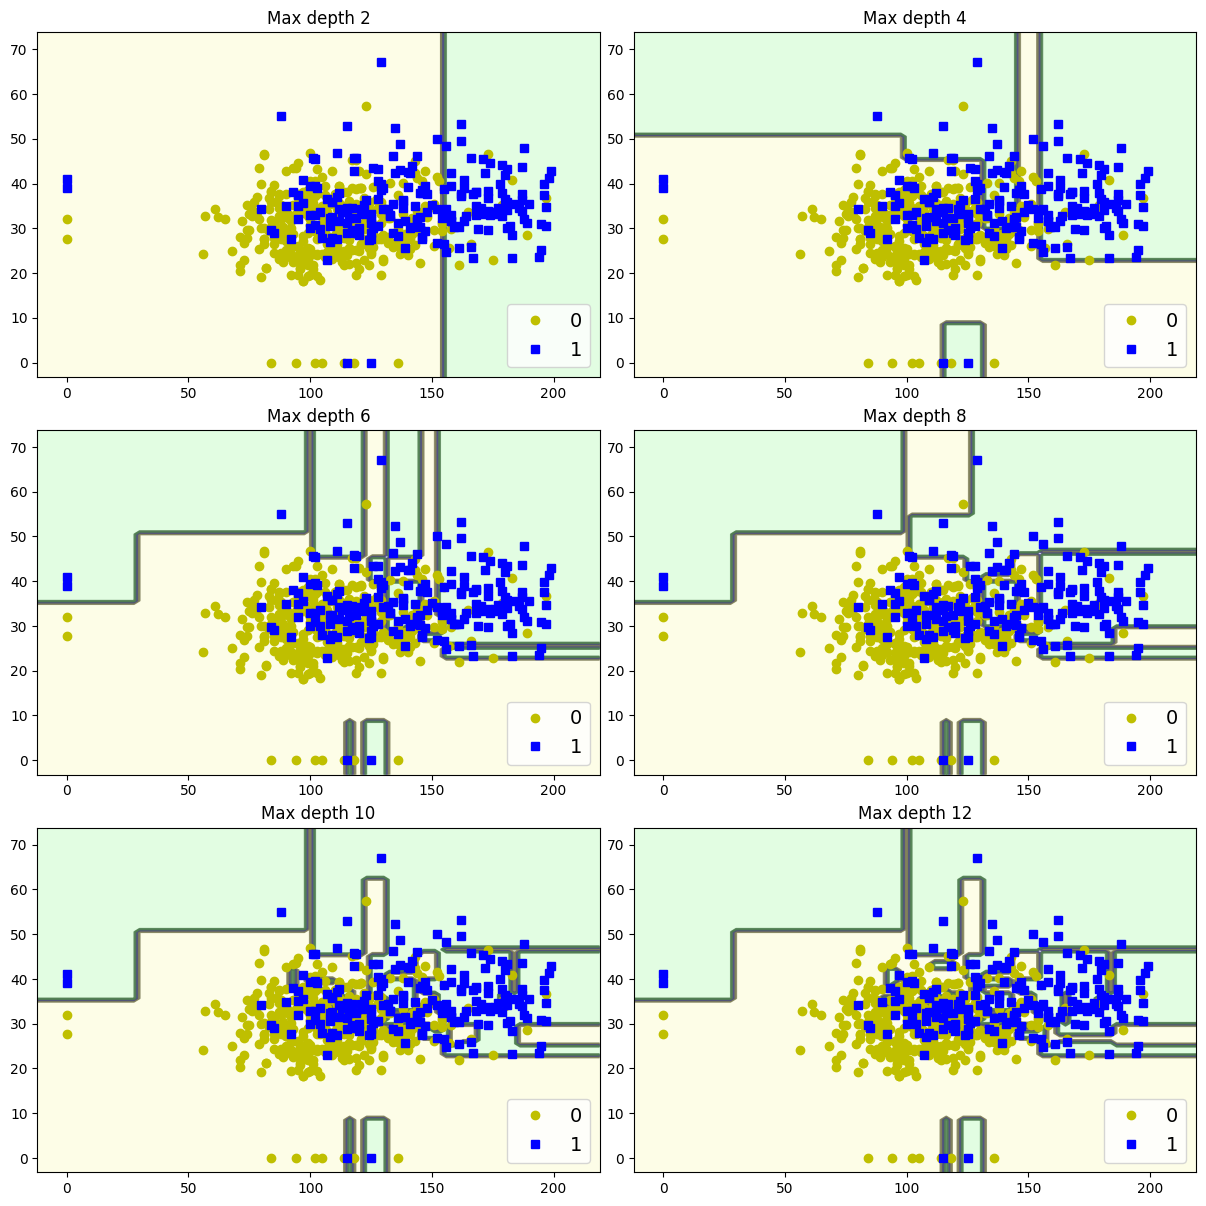

In [201]:
f, axes = plt.subplots(3,2, figsize=(12,12))
max_depths = [2, 4, 6, 8, 10, 12]

for i, ax in enumerate(axes.flat):
    tree_clf = DecisionTreeClassifier(max_depth=max_depths[i])
    tree_clf.fit(X_train, y_train)
    _ = plot_decision_boundary(tree_clf, X_train, y_train, ax=ax)
    ax.set_title(f'Max depth {max_depths[i]}')
    plt.tight_layout(pad=0.5)

We see that already with `max_depth` set to 4, the decision tree seems to be overfitting pretty badly. This gets even worse if you have more complicated data sets.

## Regularization: controlling the complexity

Restricting models can be used to reduce their variance and, therefore, their tendency to overfit. This is called **regularization**.

In decision trees, the following parameters can be used for regularization:

- **`Max_depth`:** As we saw above, by reducing the maximum depth a decision tree is allowed to have, one can simplify the decision boundary and therefore prevent overfitting. Decrease to regularize.
- **`min_samples_split`**: This parameter controls the minimum number of samples a node can have to be allowed to split. Increase to regularize.
- **`min_samples_leaf`**: The minimum number of samples a leaf must contain. Increase to regularize.
- **`max_features`**: The maximum number of features that are evaluated when deciding whether to split each node. Decrease to regularize.
- **`max_leaf_nodes`**: The maximum number of leaf nodes. Decrease to regularize.
- **`min_impurity_decrease`**: Split nodes if the split results in a decrease of the impurity greater than or equal to this value. Increase to regularize.
- **`min_impurity_split`**: Split a node if its impurity is above this threshold. Otherwise, it's a leaf. Decrease to regularize.

We can play around with some of these parameters and make it interactive:

In [202]:
from ipywidgets import interactive, FloatSlider, IntSlider

In [203]:
def make_decision_tree(max_depth, min_samples_leaf):
    tree_clf = DecisionTreeClassifier(max_depth=max_depth,
                                        min_samples_leaf=min_samples_leaf,
                                     )

    tree_clf.fit(X_train, y_train)

    _ = plot_decision_boundary(tree_clf,X_train, y_train)

    plt.show()

In [204]:
interactive_plot = interactive(make_decision_tree,
                               max_depth = IntSlider(min=1, max=15, step=1, value=2),
                               min_samples_leaf=IntSlider(min=1, max=15, value=None)
                              )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=2, description='max_depth', max=15, min=1), IntSlider(value=1, descripti…

> Feel free to play around also with other parameter settings.

> In practice, it's typically enough to use *one* of `max_depth`, `max_leaf_nodes` or `min_samples_leaf` to prevent overfitting.